In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
path = "data/"
os.listdir(path)

['cluster-2021-06-01-11-30-19.csv',
 'log-2021-06-01-11-27-45.csv',
 'log-2021-06-05-02-02-53.csv',
 'log-2021-06-01-09-58-05.csv',
 'log-2021-06-01-13-44-01.csv',
 'log-2021-05-31-19-44-46.csv',
 'log-2021-05-31-20-10-07.csv',
 'cluster-2021-06-07-08-28-26.csv',
 'cluster-2021-06-06-05-10-51.csv',
 'log-2021-05-31-22-05-10.csv',
 'log-2021-06-06-05-17-04.csv',
 'log-2021-05-31-20-51-11.csv',
 'cluster-2021-05-31-22-05-10.csv',
 'cluster-2021-06-06-05-25-28.csv',
 'log-2021-06-06-05-25-28.csv',
 'log-2021-06-06-22-51-18.csv',
 'log-2021-05-31-20-11-27.csv',
 'cluster-2021-05-31-19-44-46.csv',
 'cluster-2021-06-06-05-17-04.csv',
 'log-2021-06-04-23-36-08.csv',
 'log-2021-05-31-19-15-54.csv',
 'log-2021-06-05-04-54-24.csv',
 'cluster-2021-06-01-10-32-01.csv',
 'log-2021-05-31-21-06-48.csv',
 'log-2021-05-31-21-02-47.csv',
 'log-2021-06-07-08-28-26.csv',
 'cluster-2021-05-31-21-08-44.csv',
 'cluster-2021-06-01-13-38-27.csv',
 'log-2021-06-04-23-36-24.csv',
 'log-2021-06-04-23-35-52.csv',


In [3]:
clu_info = pd.read_csv(os.path.join(path,"cluster-2021-06-07-08-28-26.csv"), index_col=0)
time = clu_info.index.to_list()
nodes = clu_info.columns.to_list()

In [4]:
def cluster_resource_data(cluster_info):
    def split_resource(x):
        arr = x.split(',')
        return float(arr[0]), float(arr[1])
    nodes = clu_info.columns.to_list()
    res_map = dict()
    for node in nodes:
        k8s_master_data = clu_info[node].to_list()
        a = map(split_resource, k8s_master_data)
        cpu_list = []
        mem_list = [] 
        for item in a:
            cpu_list.append(item[0])
            mem_list.append(item[1])
        res_map[node] = (cpu_list, mem_list)
    return res_map
    

In [5]:
data = cluster_resource_data(clu_info)
nodes = data.keys()

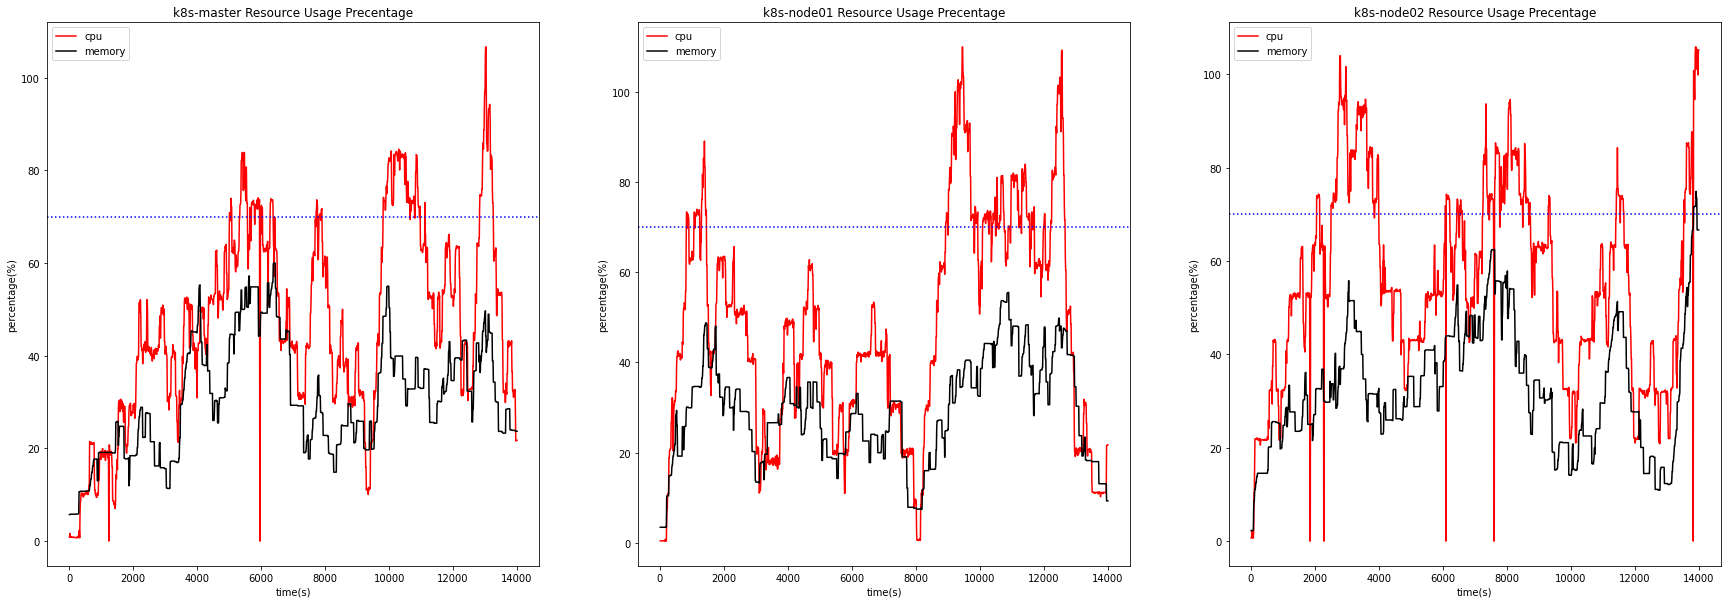

In [6]:
fig,ax=plt.subplots(1,len(nodes), figsize=(30, 10))
# fig2,ax2=plt.subplots(1,1)
color = ['r-', 'g-', 'b-']
for i, node in enumerate(nodes):
    ax[i].plot(time, data[node][0], 'r-', label="cpu")
    ax[i].plot(time, data[node][1], 'k', label="memory")
    ax[i].axhline(y=70,ls=":",c="blue")
    ax[i].set_title(node + " Resource Usage Precentage")
    ax[i].set_xlabel('time(s)')
    ax[i].set_ylabel('percentage(%)')
    ax[i].legend()
#     ax2.plot(time, data[node][0], color[i], label=node)
# ax.imshow()
plt.savefig("resource percentage.png")
# ax2.set_title("nodes cpu load")
# ax2.legend()



In [7]:
path = "data/"
os.listdir(path)

['cluster-2021-06-01-11-30-19.csv',
 'log-2021-06-01-11-27-45.csv',
 'log-2021-06-05-02-02-53.csv',
 'log-2021-06-01-09-58-05.csv',
 'log-2021-06-01-13-44-01.csv',
 'log-2021-05-31-19-44-46.csv',
 'log-2021-05-31-20-10-07.csv',
 'cluster-2021-06-07-08-28-26.csv',
 'cluster-2021-06-06-05-10-51.csv',
 'log-2021-05-31-22-05-10.csv',
 'log-2021-06-06-05-17-04.csv',
 'log-2021-05-31-20-51-11.csv',
 'cluster-2021-05-31-22-05-10.csv',
 'cluster-2021-06-06-05-25-28.csv',
 'log-2021-06-06-05-25-28.csv',
 'log-2021-06-06-22-51-18.csv',
 'log-2021-05-31-20-11-27.csv',
 'cluster-2021-05-31-19-44-46.csv',
 'cluster-2021-06-06-05-17-04.csv',
 'log-2021-06-04-23-36-08.csv',
 'log-2021-05-31-19-15-54.csv',
 'log-2021-06-05-04-54-24.csv',
 'cluster-2021-06-01-10-32-01.csv',
 'log-2021-05-31-21-06-48.csv',
 'log-2021-05-31-21-02-47.csv',
 'log-2021-06-07-08-28-26.csv',
 'cluster-2021-05-31-21-08-44.csv',
 'cluster-2021-06-01-13-38-27.csv',
 'log-2021-06-04-23-36-24.csv',
 'log-2021-06-04-23-35-52.csv',


In [8]:
clu_info = pd.read_csv(os.path.join(path,"log-2021-06-07-08-28-26.csv"), index_col=0)

In [9]:
rewards = list(np.ravel(clu_info.iloc[:, 1:3].values.tolist()))

In [10]:
time = clu_info.index.to_list()

No handles with labels found to put in legend.


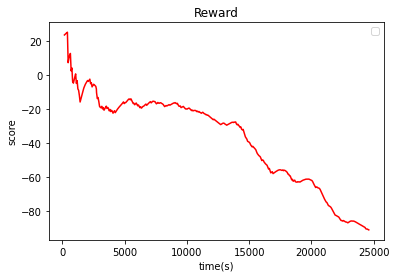

In [11]:
fig,ax=plt.subplots(1,1)
ax.plot(time, rewards, 'r-')
ax.set_title("Reward")
ax.set_xlabel('time(s)')
ax.set_ylabel('score')
ax.legend()
plt.savefig("reward.png")